In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [2]:
df = pd.read_csv('data/georgia_reported.csv')
df.head()

,Unnamed: 0,date,state,fips,cases,deaths
0,256,2020-03-02,Georgia,13,0,0
1,271,2020-03-03,Georgia,13,0,0
2,287,2020-03-04,Georgia,13,0,0
3,305,2020-03-05,Georgia,13,0,0
4,326,2020-03-06,Georgia,13,0,0


In [38]:
ycases = df['cases'].to_numpy()
ydeaths = df['deaths'].to_numpy()
ydata = [(ycases[i], ydeaths[i]) for i in range(len(ycases))]
ydata = np.array(ydata, dtype = float)


xdata = list(range(1, len(ycases)+1))
xdata = np.array(xdata, dtype=float)
# xdata = np.concatenate((xdata, xdata))

ydata

array([[0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00],
       [1.000e+00, 0.000e+00],
       [2.000e+00, 0.000e+00],
       [3.000e+00, 0.000e+00],
       [3.000e+00, 1.000e+00],
       [4.000e+00, 1.000e+00],
       [6.000e+00, 1.000e+00],
       [9.000e+00, 1.000e+00],
       [1.100e+01, 1.000e+00],
       [1.400e+01, 1.000e+00],
       [1.900e+01, 3.000e+00],
       [2.800e+01, 1.000e+01],
       [4.800e+01, 1.400e+01],
       [5.500e+01, 2.000e+01],
       [6.200e+01, 2.500e+01],
       [8.000e+01, 2.500e+01],
       [1.090e+02, 3.800e+01],
       [1.380e+02, 4.700e+01],
       [1.640e+02, 5.600e+01],
       [2.190e+02, 6.400e+01],
       [2.440e+02, 7.900e+01],
       [2.680e+02, 8.300e+01],
       [3.030e+02, 1.020e+02],
       [4.110e+02, 1.250e+02],
       [4.740e+02, 1.540e+02],
       [5.440e+02, 1.760e+02],
       [

In [ ]:
def poly(x_, a, b, c1, c2, c3, c4, c5, c6):
    #all this is just to split x_data into the original parts of x
    l= len(x[0])
    l1= len(x[1])
    s=l+l1
    s1=l2+s


In [25]:
def sird_model(y, x, beta, gamma, mu):
    dS = -beta * y[0] * y[1] / N 
    dR = gamma * y[1]
    dM = mu * y[1]
    dI = -(dS + dR + dM)
    return dS, dI, dR, dM

[ 5.40094364e+00  8.67543044e-02  8.88704649e-02  1.70527993e+05
  9.72000738e+01 -3.23917784e-10  6.88303010e-03]


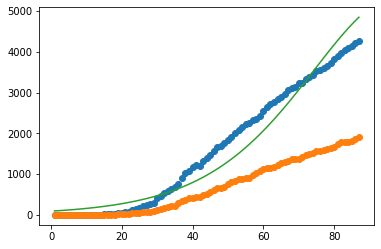

In [42]:
def fit_odeint(x, beta, gamma, mu, S0, I0, R0, M0):
    r1 = integrate.odeint(func = sird_model, y0 = (S0, I0, R0, M0), t = x[:len(ycases)], args=(beta, gamma, mu))[:,1]

    return r1
        
                                                                              



N = 3989167  ## it should be the population... not sure...

popt, pcov = optimize.curve_fit(f = fit_odeint, xdata = xdata, ydata = ycases, p0 = (0.1, 0.1, 0.1, ycases[-1], 1, 0, ydeaths[0]))
fitted = fit_odeint(xdata, *popt)

print(popt)


plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.show()

In [ ]:
df = pd.DataFrame({
    'Actual': extended_actual,
    'S': prediction.y[0],
    'I': prediction.y[1],
    'R': prediction.y[2],
     'M'
})
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title(self.state)
df.plot(ax=ax)

In [25]:
integrate.odeint?

Signature:
integrate.odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the 

In [24]:
optimize.curve_fit?

Signature:
optimize.curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``

Parameters
----------
f : callable
    The model function, f(x, ...).  It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like or object
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, but can actually be any object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N).  If None, then the
    initial values will all be 1 (if the number of parameters for th